<a href="https://colab.research.google.com/github/nadienuncanada/BigData/blob/main/BigData_Practicas_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BigData 2024 - Spark

## Inicializacion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/BigData'
GENERALinputPath= ruta + '/input'

# Instalamos Spark para Python
!pip install pyspark

import os

# Instalamos Java SDK 8
!apt-get install -y openjdk-8-jdk -qq > /dev/null
!echo $(/usr/libexec/java_home -v 1.8)

#set environment variable
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!echo 2 | update-alternatives --config java

from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
sc = SparkContext("local", "My program")
sqlContext = SQLContext(sc)

## Practica 4

### EJ3



Usando el dataset Banco, escriba un script en Python usando Spark para responder a
las siguientes preguntas:


a. Nombre y apellidos de los clientes capricornianos.


b. Nombre y apellido de los clientes de nacionalidad argentina.


c. Del resultado de a) cuántos nacieron en verano.


d. Del resultado de b) quién es el cliente más joven y quién el más viejo.


e. El ID de la caja que tiene asociado el préstamo con mayor cantidad de cuotas y
entre las que tienen la misma cantidad, el de mayor monto.


f. Los ID de clientes (únicos) con al menos una caja de ahorro (en positivo) cuyo
saldo es mayor a 300 U$S.


g. Del dataset Movimientos, el monto del mayor movimiento y el id de caja del
último movimiento.

In [ ]:
clientes = sc.textFile(GENERALinputPath + "/Banco/Clientes/Clientes.txt")
prestamos = sc.textFile(GENERALinputPath + "/Banco/Prestamos/Prestamos.txt")
cajaDeAhorro = sc.textFile(GENERALinputPath + "/Banco/CajasDeAhorro/CajasDeAhorro.txt")

print(clientes.count())


def init(line):
  line = line.split()
  line[4] = line[4].split("-")
  return line

In [ ]:
#a. Nombre y apellidos de los clientes capricornianos.


def obtener_signo_zodiacal(dia, mes):
    if (mes == 1 and dia >= 20) or (mes == 2 and dia <= 18):
        return "Acuario"
    elif (mes == 2 and dia >= 19) or (mes == 3 and dia <= 20):
        return "Piscis"
    elif (mes == 3 and dia >= 21) or (mes == 4 and dia <= 19):
        return "Aries"
    elif (mes == 4 and dia >= 20) or (mes == 5 and dia <= 20):
        return "Tauro"
    elif (mes == 5 and dia >= 21) or (mes == 6 and dia <= 20):
        return "Géminis"
    elif (mes == 6 and dia >= 21) or (mes == 7 and dia <= 22):
        return "Cáncer"
    elif (mes == 7 and dia >= 23) or (mes == 8 and dia <= 22):
        return "Leo"
    elif (mes == 8 and dia >= 23) or (mes == 9 and dia <= 22):
        return "Virgo"
    elif (mes == 9 and dia >= 23) or (mes == 10 and dia <= 22):
        return "Libra"
    elif (mes == 10 and dia >= 23) or (mes == 11 and dia <= 21):
        return "Escorpio"
    elif (mes == 11 and dia >= 22) or (mes == 12 and dia <= 21):
        return "Sagitario"
    elif (mes == 12 and dia >= 22) or (mes == 1 and dia <= 19):
        return "Capricornio"
    else:
        return "Fecha no válida"

# Ejemplo de uso:
# mes = int(input("Ingrese el mes (número entero): "))
# dia = int(input("Ingrese el día del mes: "))
# print("El signo zodiacal es:", obtener_signo_zodiacal(dia, mes))





clientesA = clientes.map(init) \
                  .filter(lambda tupla: obtener_signo_zodiacal(int(tupla[4][2]), int(tupla[4][1])) == "Capricornio")
print(clientesA.count())
#clientesA.collect()

In [ ]:
#b. Nombre y apellido de los clientes de nacionalidad argentina.


clientes = sc.textFile(GENERALinputPath + "/Banco/Clientes/Clientes.txt")

print(clientes.count())


clientesB = clientes.map(init) \
                  .filter(lambda tupla: tupla[5] in "ARG") #\
                  #.map(lambda tupla: (tupla[1], tupla[2], tupla[5]))

print(clientesB.count())

In [ ]:
#c. Del resultado de a) cuántos nacieron en verano.

def obtener_estacion(dia, mes):
    if (mes == 6 and dia >= 21) or (mes == 7) or (mes == 8) or (mes == 9 and dia < 23):
        return "Invierno"
    elif (mes == 9 and dia >= 23) or (mes == 10) or (mes == 11) or (mes == 12 and dia < 21):
        return "Primavera"
    elif (mes == 12 and dia >= 21) or (mes == 1) or (mes == 2) or (mes == 3 and dia < 20):
        return "Verano"
    elif (mes == 3 and dia >= 20) or (mes == 4) or (mes == 5) or (mes == 6 and dia < 21):
        return "Otoño"
    else:
        print("NO ESSSSSSSSSSSS")
        return "Fecha no válida"



print(clientes.count())


clientesC = clientesA.filter(lambda tupla: obtener_estacion(int(tupla[4][2]), int(tupla[4][1])) == "Verano")


print(clientesC.count())
#clientesA.collect()

In [ ]:
#d. Del resultado de b) quién es el cliente más joven y quién el más viejo.

print(clientesB.count())


clientesD = clientesB.map(lambda t: (t,t)) \
                    .reduce(lambda t1, t2: (t1[0] if t1[0][4] < t2[0][4] else t2[0]  ,
                                                t1[1] if t1[1][4] > t2[1][4] else t2[1]))

print(clientesD)


clientesD2 = clientesB.aggregate((('', '', '', '', ['9999', '99', '99'], ''), ('', '', '', '', ['0000', '00', '00'], '')) ,
                                              (lambda res, ori:
                                                        (res[0] if res[0][4] < ori[4] else ori,
                                                        res[1] if res[1][4] > ori[4] else ori)) ,
                                              (lambda r1, r2:
                                                  (r1[0] if r1[0][4] < r2[0][4] else r2[0],
                                                  r1[1] if r1[1][4] > r2[1][4] else r2[1] ) ) )

clientesD2

In [ ]:
#e. El ID de la caja que tiene asociado el préstamo con mayor cantidad de cuotas y entre las que tienen la misma cantidad, el de mayor monto.

print(prestamos.count())

def chequear(t1, t2):
  if t1[1] > t2[1]:
    return t1
  elif t1[1] == t2[1] and t1[2] > t2[2]:
    return t1
  else :
    return t2

prestamosE = prestamos.map(lambda t: t.split()) \
                .reduce(lambda t1, t2: chequear(t1,t2))

print(prestamosE)

cajaDeAhorroE = cajaDeAhorro.map(lambda t: t.split()) \
                        .filter(lambda cajaDeAhorro: cajaDeAhorro[0]==prestamosE[0]).collect()

cajaDeAhorroE

In [ ]:
#f. Los ID de clientes (únicos) con al menos una caja de ahorro (en positivo) cuyo saldo es mayor a 300 U$S.



cajaDeAhorroF = cajaDeAhorro.map(lambda t: t.split()) \
                        .filter(lambda cajaDeAhorro: float(cajaDeAhorro[2])>300) \
                        .map(lambda t: (t[1],(t[0],t[2])))


clientesF = clientes.map(lambda t: init(t)) \
                    .map(lambda t: (t[0],(t[1],t[2],t[3]))) \
                    .join(cajaDeAhorroF) \
                    .distinct()

print(cajaDeAhorroF.collect())
clientesF.collect()

In [ ]:
#g. Del dataset Movimientos, el monto del mayor movimiento y el id de caja del último movimiento.



#con aggregate

### EJ4

a) SI SE PUEDE

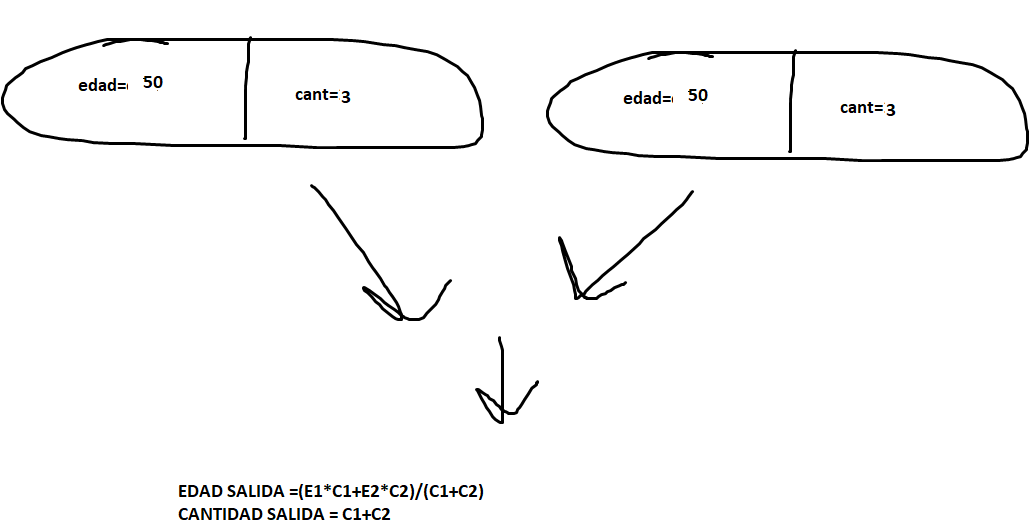


b) SI SE PUEDE:


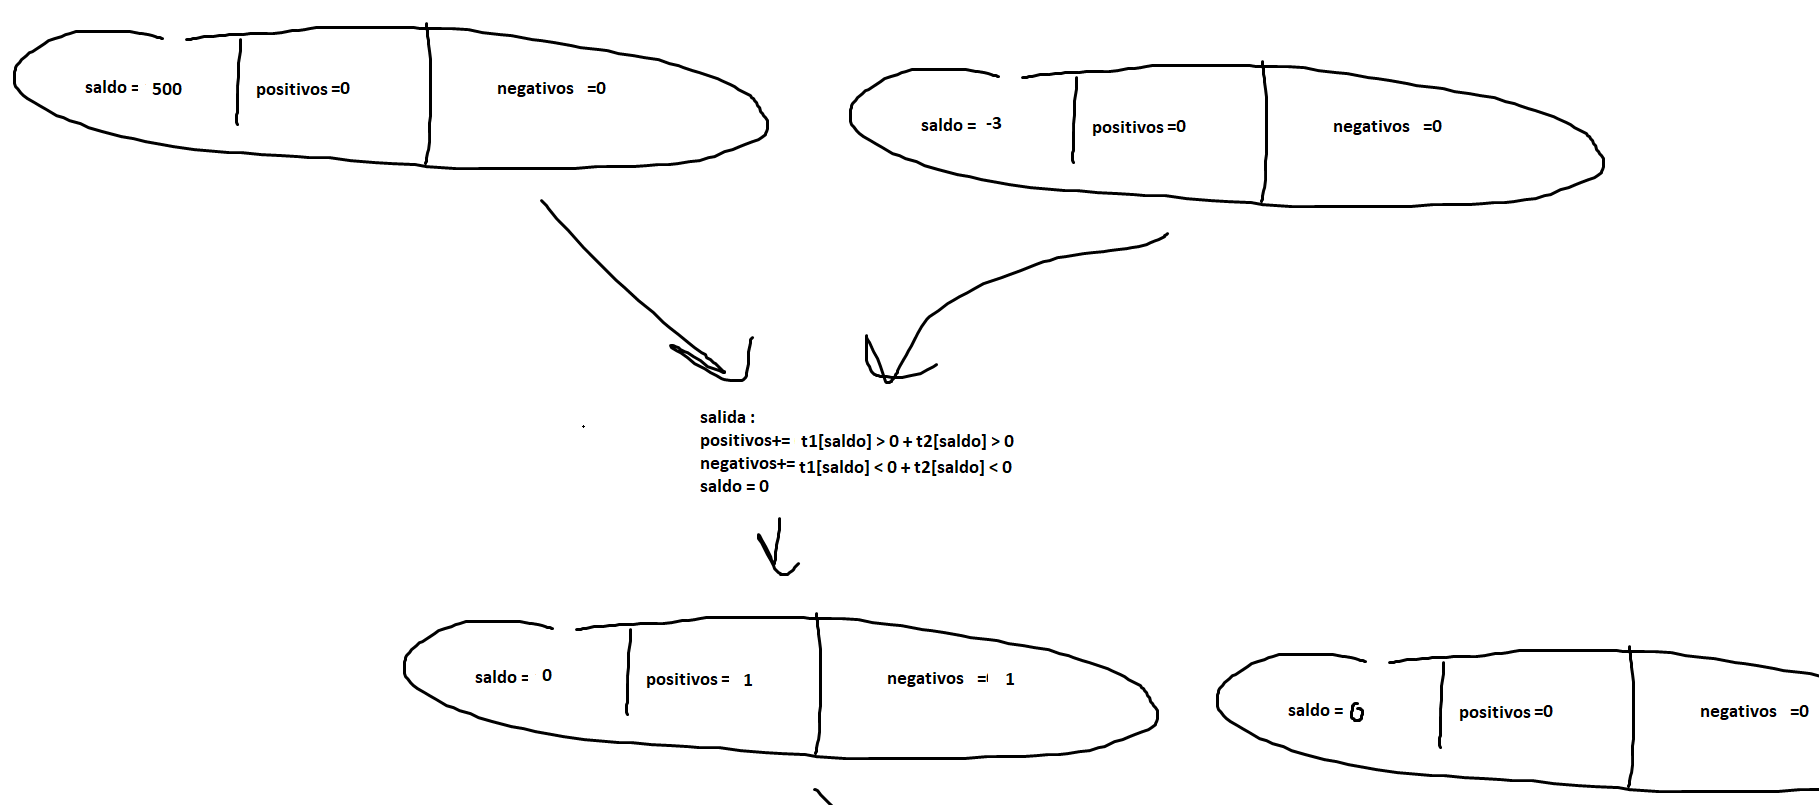

### EJ5

<ID_Estación, fecha_registro, temperatura, humedad, precipitación>

a. estacionNorte.txt almacena la información en grados centígrados, porcentaje
de humedad, y milímetros de lluvia.
b. estacionSur.txt almacena la información en grados Fahrenheit, porcentaje de
humedad y centímetros de lluvia.

a) el promedio de temperatura, de humedad y precipitación total entre todas las
estaciones.


b) el ID de la estación y la fecha que registró
o la temperatura más fría
o la temperatura más calurosa
o la de mayor humedad
o la de menor humedad
o la de más precipitación
o la de menor precipitación

In [ ]:
def init(elem):
    t = elem.split()
    return (t[0], t[1], float(t[2]), float(t[3]), float(t[4]))


def fahren_to_cent(t):
    return (t[0], t[1], (t[2] - 32)/(9/5) , t[3], t[4]*10)

In [ ]:
estacionesSur = sc.textFile(GENERALinputPath + "/EstacionesMeteorologicas/Sur/")
estacionesNorte = sc.textFile(GENERALinputPath + "/EstacionesMeteorologicas/Norte/")


#print(estacionesSur.count()) #20k
#print(estacionesNorte.count()) #20k


estaciones = estacionesSur.map(init).map(fahren_to_cent).union(estacionesNorte.map(init))
estaciones.persist()

print(estaciones.count()) #40k
print(estaciones.count()) #40k



In [ ]:
#estacionesReduce = estaciones.map(agregar 4 columnas).reduce()  # no es viable ya que hay que agregar 2 elementos a cada tupla (uno para cant y otro para promedio), lo cual agrega mas datos al BigData

# a)


estacionesAggregate = estaciones.aggregate(
    (0,0,0,0),
    (lambda res, ori: (res[0] + 1, res[1] + ori[2], res[2] + ori[3], res[3] + ori[4])),
    (lambda r1, r2: (r1[0] + r2[0], r1[1] + r2[1], r1[2] + r2[2], r1[3] + r2[3]))
)

res = (estacionesAggregate[1]/estacionesAggregate[0], estacionesAggregate[2]/estacionesAggregate[0], estacionesAggregate[3]/estacionesAggregate[0])

res

In [ ]:
# b)
def faggregateParcial(res, ori):
  tem_es_menor = ori[1] < res[0][1]
  tem_es_mayor = ori[1] > res[1][1]
  hum_es_menor = ori[1] < res[2][1]
  hum_es_mayor = ori[1] > res[3][1]
  pre_es_menor = ori[1] < res[4][1]
  pre_es_mayor = ori[1] > res[5][1]

  return (
      (ori[0] if tem_es_menor else res[0][0], ori[1] if tem_es_menor else res[0][1]),
      (ori[0] if tem_es_mayor else res[1][0], ori[1] if tem_es_mayor else res[1][1]),
      (ori[0] if hum_es_menor else res[2][0], ori[2] if hum_es_menor else res[2][1]),
      (ori[0] if hum_es_mayor else res[3][0], ori[2] if hum_es_mayor else res[3][1]),
      (ori[0] if pre_es_menor else res[4][0], ori[3] if pre_es_menor else res[4][1]),
      (ori[0] if pre_es_mayor else res[5][0], ori[3] if pre_es_mayor else res[5][1]),
  )


def faggregateRes(r1, r2):
  tem_es_menor = r2[0][1] < r1[0][1]
  tem_es_mayor = r2[1][1] > r1[1][1]
  hum_es_menor = r2[2][1] < r1[2][1]
  hum_es_mayor = r2[3][1] > r1[3][1]
  pre_es_menor = r2[4][1] < r1[4][1]
  pre_es_mayor = r2[5][1] > r1[5][1]

  return (
      (r2[0][0] if tem_es_menor else r1[0][0], r2[0][1] if tem_es_menor else r1[0][1]),
      (r2[1][0] if tem_es_mayor else r1[1][0], r2[1][1] if tem_es_mayor else r1[1][1]),
      (r2[2][0] if hum_es_menor else r1[2][0], r2[2][1] if hum_es_menor else r1[2][1]),
      (r2[3][0] if hum_es_mayor else r1[3][0], r2[3][1] if hum_es_mayor else r1[3][1]),
      (r2[4][0] if pre_es_menor else r1[4][0], r2[4][1] if pre_es_menor else r1[4][1]),
      (r2[5][0] if pre_es_mayor else r1[5][0], r2[5][1] if pre_es_mayor else r1[5][1]),
  )



result = estaciones.map(lambda t: (t[0], (t[1], t[2], t[3], t[4]))) \
          .aggregateByKey(
              (('', 9999), ('', -9999), ('', 9999), ('', -9999), ('', 9999), ('', -9999)),
              faggregateParcial,
              faggregateRes
          )

resultados = result.collect()
print (resultados)

## Practica 5

### EJ5

In [ ]:
clientes = sc.textFile(GENERALinputPath + "/Banco/Clientes/Clientes.txt")
prestamos = sc.textFile(GENERALinputPath + "/Banco/Prestamos/Prestamos.txt")
cajaDeAhorro = sc.textFile(GENERALinputPath + "/Banco/CajasDeAhorro/CajasDeAhorro.txt")

print(clientes.count())


def init(line):
  line = line.split()
  #line[4] = line[4].split("-")
  print(line)
  return (line[0], tuple(line[1:]))

27086


In [ ]:
cajaDeAhorro5 = cajaDeAhorro.map(init).aggregateByKey( (0, 0, 0),
    (lambda res, ori:
        ( res[0] + float(ori[1]),
          float(res[1])+1,
          float(res[2])+(float(ori[1]) < 0)
        )
     ),
      (lambda r1, r2:
        ( r1[0] + r2[0],
          r1[1] + r2[1],
          r1[2] + r2[2]
        )
     )
)

prestamos5 = prestamos.map(init).aggregateByKey( (0, 0, 0),
    (lambda res, ori:
        ( res[0] + float(ori[1]),
          res[1] + float(ori[1]),
          float(res[2])+1
        )
     ),
      (lambda r1, r2:
        ( r1[0] + r2[0],
          r1[1] + r2[1],
          r1[2] + r2[2]
        )
     )
)

res1 = cajaDeAhorro5.first()
res2 = prestamos5.first()

print(res1)
print(res2)

('336442', (-87702.5531547622, 1.0, 1.0))
('399580', (1432.83477152364, 1432.83477152364, 1.0))


In [ ]:
def calcular_factor_riego(res1, res2):
    # Asignación de valores a las variables (A, B, C, D, E, F, b)
    A = res1[0]
    B = res1[1]
    C = res1[2]
    D = res2[0]
    E = res2[1] / res2[2]
    F = res2[2]
    b = B

    # Cálculo del denominador y del factor de riesgo
    denominador = (A / B) ** (1 / (b - C + 1))
    factor_riego = ((D / E) + 0.001) ** F / denominador

    return factor_riego

In [ ]:
calcular_factor_riego(res1[1],res2[1])

-1.1413578784116004e-05

### EJ6

In [ ]:
datosPorUsuario = cajaDeAhorro5.join(cajaDeAhorro.map(init)).map(lambda t: (t[0], (tuple(t[1][1][1:]),t[1][2][1]))).join(prestamos5)


def fmap(datosUsr):
  return (datosUsr[0], calcular_factor_riego(datosUsr[1][0],datosUsr[1][1]), datosUsr[1][0][3])

resultado = datosPorUsuario.map(fmap).map(lambda t: (t[2],t[1],t[0])).filter(lambda t: t[1]<2).join(clientes.map(init)).groupBy(lambda t: t[1][1][4])

resultado.collect()


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 86.0 failed 1 times, most recent failure: Lost task 0.0 in stage 86.0 (TID 65) (230647a02128 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-61-49b0fee1ac40>", line 1, in <lambda>
IndexError: tuple index out of range

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:751)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:451)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:282)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor59.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-61-49b0fee1ac40>", line 1, in <lambda>
IndexError: tuple index out of range

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:751)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:451)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:282)


In [ ]:
clientes.map(init)

PythonRDD[242] at RDD at PythonRDD.scala:53

## Practica 5 (SQL)

In [ ]:
clientes = sc.textFile(GENERALinputPath + "/Banco/Clientes/Clientes.txt")
prestamos = sc.textFile(GENERALinputPath + "/Banco/Prestamos/Prestamos.txt")
cajaDeAhorro = sc.textFile(GENERALinputPath + "/Banco/CajasDeAhorro/CajasDeAhorro.txt")

clientes = clientes.map(lambda t : t.split("\t")) \
                    .map(lambda t: Row( id = int(t[0]),
                        nom_y_ape = t[1] + " " + t[2],
                        dni = int(t[3]),
                        fecha = t[4],
                        edad = 2024 - int(t[4].split("-")[0]),
                        nacionalidad = t[5]) )

clientesDF = sqlContext.createDataFrame(clientes)
clientesDF.registerTempTable("Cliente")



cajaDeAhorro = cajaDeAhorro.map(lambda t : t.split("\t")) \
                    .map(lambda t: Row( id = int(t[0]),
                        id_cliente = int(t[1]),
                        saldo = float(t[2])) )

cajaDeAhorroDF = sqlContext.createDataFrame(cajaDeAhorro)
cajaDeAhorroDF.registerTempTable("CajaDeAhorro")



prestamos = prestamos.map(lambda t : t.split("\t")) \
                    .map(lambda t: Row( id_caja = int(t[0]),
                        cuotas = int(t[1]),
                        monto = float(t[2]) ) )

prestamosDF = sqlContext.createDataFrame(prestamos)
prestamosDF.registerTempTable("Prestamo")

###EJ4


In [ ]:
#A)

result = sqlContext.sql(
    "SELECT nacionalidad, count(*) as total_clientes \
     FROM Cliente \
     GROUP BY nacionalidad \
     ORDER BY total_clientes DESC"
)

def script_de_python():
  # Listas de códigos de países europeos y americanos
  paises_europeos = ['ESP', 'FRA', 'DEU', 'ITA']  # Añade más códigos de países europeos
  paises_americanos = ['ARG', 'USA', 'BRA', 'MEX', 'ECU', 'CHI', 'URU']  # Añade más códigos de países americanos

  # Inicializar contadores para europeos y americanos
  total_europeos = 0
  total_americanos = 0

  # Iterar sobre los resultados de la consulta
  for row in result.collect():
      nacionalidad = row['nacionalidad']
      total_clientes = row['total_clientes']

      # Sumar el total de europeos
      if nacionalidad in paises_europeos:
          total_europeos += total_clientes

      # Sumar el total de americanos
      elif nacionalidad in paises_americanos:
          total_americanos += total_clientes

  # Comparar los totales y obtener el resultado
  if total_europeos > total_americanos:
      print("El banco tiene más clientes europeos que americanos.")
  else:
      print("El banco tiene más clientes americanos que europeos.")

result.collect()


In [ ]:
#B)

result = sqlContext.sql(
    "SELECT nacionalidad, avg(edad) as promedio_edad \
     FROM Cliente \
     GROUP BY nacionalidad \
     ORDER BY promedio_edad DESC"
)

result.collect()

#SCRIPT DE PYTHON

In [ ]:
#C)

query = sqlContext.sql(
    "SELECT id_cliente, sum(saldo) as suma_saldo \
     FROM CajaDeAhorro \
     GROUP BY id_cliente \
     HAVING suma_saldo < 0"
)

query.registerTempTable("ClientesDeudores")

result = sqlContext.sql(
    "SELECT nacionalidad, count(*) as cant_deudores \
     FROM Cliente as c inner join ClientesDeudores as cd on c.id = cd.id_cliente \
     GROUP BY nacionalidad \
     ORDER BY cant_deudores DESC"
)

result.collect()

#SCRIPT DE PYTHON

In [ ]:
#D)

query = sqlContext.sql(
    "SELECT id_cliente, cuotas \
     FROM CajaDeAhorro as c inner join Prestamo as p on c.id = p.id_caja  "
)

query.registerTempTable("ClientePrestamos")

result = sqlContext.sql(
    "SELECT nacionalidad, avg(cuotas) as avg_cuotas \
     FROM Cliente as c inner join ClientePrestamos as cp on c.id = cp.id_cliente \
     GROUP BY nacionalidad "
)

result.collect()

#SCRIPT DE PYTHON

##Practicta 6


###Ej 1

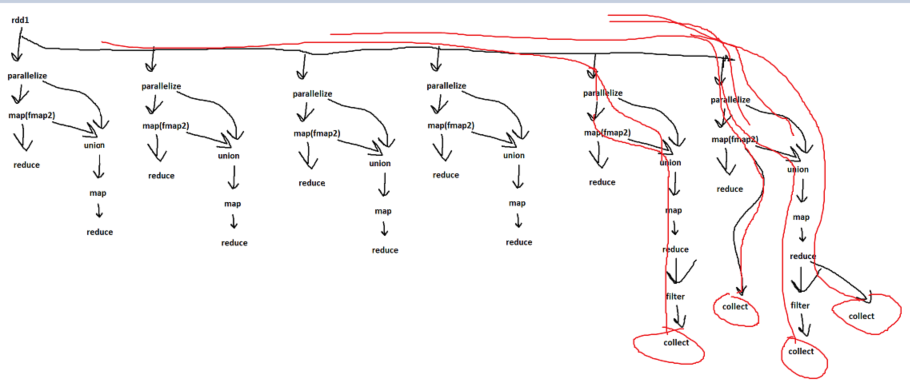

###Ej6

<nombre_individuo, dni_individuo, dni_mamá>

a) Dado los dni de dos individuos indicar si son primos (dos individuos son primos
si tienen la misma abuela)


b) Dado los dni de dos individuos i1 y i2 indicar si i1 es ancestro de i2.


c) El nombre de la “abuela” que tiene más descendientes


d) Los nombres de los hermanos de la familia más numerosa (la cantidad de
integrantes de una familia solo se calcula con la cantidad de hermanos más la
mamá). Podría existir más de una familia más numerosa, en cuyo caso se
deben imprimir todos los nombres de los hermanos integrantes de cada
familia.

In [ ]:
import random

genealogia = sc.textFile(GENERALinputPath + "/Genealogia/Genealogia.txt")

hijos = genealogia.map(lambda t : t.split()) \
                    .map(lambda t: Row( nombre_individuo = t[0],
                        dni_individuo = int(t[1]) if t[1] != 'None' else random.randint(1000000, 9000000),
                        dni_mama = int(t[2]) if t[2] != 'None' else random.randint(1000000, 9000000) ))

hijosDF = sqlContext.createDataFrame(hijos)
hijosDF.registerTempTable("Hijos")


madres = genealogia.map(lambda t : t.split("\t")) \
                    .map(lambda t: Row( nombre_madre = t[0],
                        dni_madre = int(t[1]) if t[1] != 'None' else random.randint(1000000, 9000000),
                        dni_abuela = int(t[2]) if t[2] != 'None' else random.randint(1000000, 9000000) ))

madresDF = sqlContext.createDataFrame(madres)
madresDF.registerTempTable("Madres")

'''
regiter("Hijos") <nombre_individuo, dni_individuo, dni_mama>
regiter("Madres") <nombre_madre, dni_madre, dni_abuela>'''

####A)

In [ ]:
from pyspark.sql import functions as F

dni_individuo1 = 4534
dni_individuo2 = 1607 #es primo de 1
dni_individuo3 = 3281 #no es primo de 1

result = sqlContext.sql(
    f"SELECT nombre_individuo, dni_individuo, dni_abuela \
       FROM Hijos as hijos INNER JOIN Madres as madres ON hijos.dni_mama = madres.dni_madre \
       WHERE dni_individuo = {dni_individuo1} OR dni_individuo = {dni_individuo2}"
)

'''
result = result.filter(
    (F.col("dni_individuo") == dni_individuo1) | (F.col("dni_individuo") == dni_individuo2)
)'''

result = result.collect()
print(result)

if result[0][2] == result[1][2]:
  print("Son primos")
else:
  print("No son primos")

####B) (falta probarlo)

In [ ]:
# RESUELTO USANDO BFS
hijo = "XXXXX"
ancestro = "YYYYY"

es_ancestro = False
colaDePersonasAAnalizar = [ancestro]

while not colaDePersonasAAnalizar.empty and not es_ancestro:

  acc = sc.broadcast(colaDePersonasAAnalizar.pop())
  hijos = genealogia.filter(elem.dni_mama == acc.value).collect()

  for elem in hijos:
    if elem.dni_individuo == hijo:
      es_ancestro=True
    else:
      colaDePersonasAAnalizar.append(elem.dni_individuo)

print(es_ancestro)



####C)

In [ ]:

cant_nietos_por_abuela = sqlContext.sql(
    "SELECT dni_abuela, count(*) as cant \
     FROM Hijos as hijos inner join Madres as madres on hijos.dni_mama = madres.dni_madre \
     GROUP BY dni_abuela"
)
cant_nietos_por_abuela.registerTempTable("CantNietos")


cant_hijos_por_abuela = sqlContext.sql(
    "SELECT dni_abuela, count(*) as cant \
     FROM Madres \
     GROUP BY dni_abuela"
)
cant_hijos_por_abuela.registerTempTable("CantHijos")


cant_descendientes_por_abuela = sqlContext.sql(
    "SELECT dni_abuela, sum(cant) as cant_descendientes \
     FROM ( \
         SELECT dni_abuela, cant FROM CantNietos \
         UNION ALL \
         SELECT dni_abuela, cant FROM CantHijos \
     ) AS UnionTable \
     GROUP BY dni_abuela"
)
cant_descendientes_por_abuela.registerTempTable("CantDescendientes")

superAbuela = sqlContext.sql(
    "SELECT dni_abuela, cant_descendientes \
    FROM CantDescendientes \
    ORDER BY cant_descendientes desc"
)

superAbuela.first()